# Let's learn about accidents in Spain

Here I present a simple Data Analysis onto the 2021 Spanish vehicle accidents statistics.

Let's start by loading the source data using the Pandas library. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

baseURL = 'https://www.dgt.es/.galleries/downloads/dgt-en-cifras/24h/TABLA_ACCIDENTES_21.xlsx'
cols = 'A:AY,BT,BU'
accidents = pd.read_excel(baseURL, engine='openpyxl', sheet_name=0, header=0, index_col=0,usecols=cols)
accidents.head()

,ANYO,MES,DIA_SEMANA,HORA,COD_PROVINCIA,COD_MUNICIPIO,ISLA,ZONA,ZONA_AGRUPADA,CARRETERA,...,TOT_CAM_MAS3500_MU30DF,TOT_BUS_MU30DF,TOT_VMP_MU30DF,TOT_OTRO_MU30DF,TOT_SINESPECIF_MU30DF,NUDO,NUDO_INFO,CARRETERA_CRUCE,ACERA,TRAZADO_PLANTA
ID_ACCIDENTE,,,,,,,,,,,,,,,,,,,,,
1,2021,1,6,13,1,0,NaN,1,1,A-625,...,0,0,0,0,0,2,NaN,NaN,998,1
2,2021,1,2,8,1,1059,NaN,3,2,No inventariada,...,0,0,0,0,0,2,NaN,NaN,998,998
3,2021,1,3,19,1,1059,NaN,3,2,No inventariada,...,0,0,0,0,0,2,NaN,NaN,998,998
4,2021,1,1,9,1,0,NaN,1,1,A-3012,...,0,0,0,0,0,2,NaN,NaN,998,4
5,2021,1,2,13,1,1059,NaN,3,2,No inventariada,...,0,0,0,0,0,2,4.0,NaN,998,998


Now that we loaded our data into a DataFrame **(df)** we can perform our analysis. Each row in the table indicates a different accident report, identified with an **index** (here, ID). In the **df** header, we can see the information presented in each column. The first few tell us when each event occured. Let's start our analysis with that!

The figure below shows a histogram with the weekly distribution of accidents. It is made obvious there that Sunday is the least likely day to be involved in an accident, while the most likely is Friday.

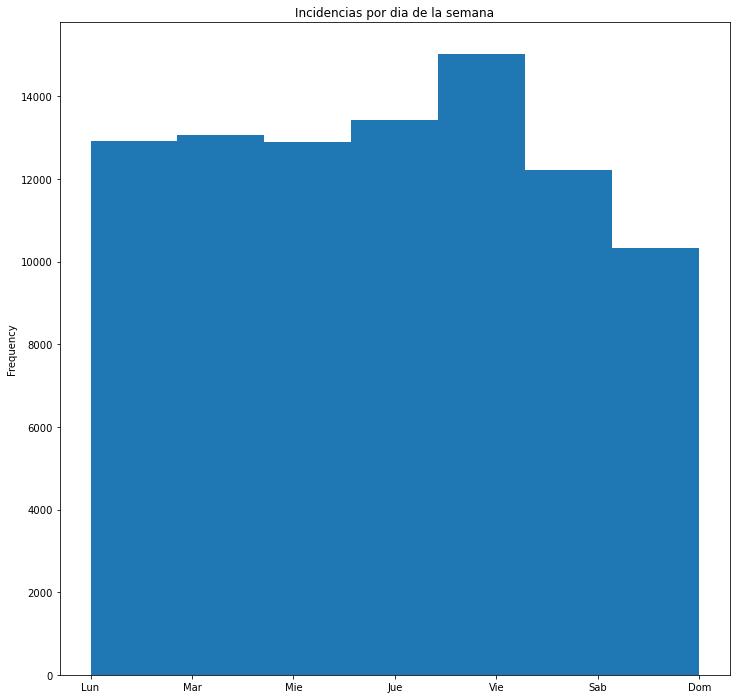

In [2]:
accidents['DIA_SEMANA'].plot(kind = 'hist', bins = 7, figsize = (12,12))
plt.xticks([1,2,3,4,5,6,7], ['Lun','Mar','Mie','Jue','Vie','Sab','Dom'])
plt.gca().set(title='Incidencias por dia de la semana')
plt.show()

The next figure shows the incident distribution across day hours. It's easy to notice how night-time and a lack of commercial activity marks the start of the day.

The distribution shape is clear. We have three obvious features and a subtle one:

- The first hours are calm, being the time between 3 and 5 the least dangerous.
- A strong increase in accidents happen between 7 and 9, coinciding with the commuter rush.
- Also a strong decrease between 18 and 20 hours.
- Notice the small notch happening between 14 and 17, the time when spaniards like to take our famous siesta.

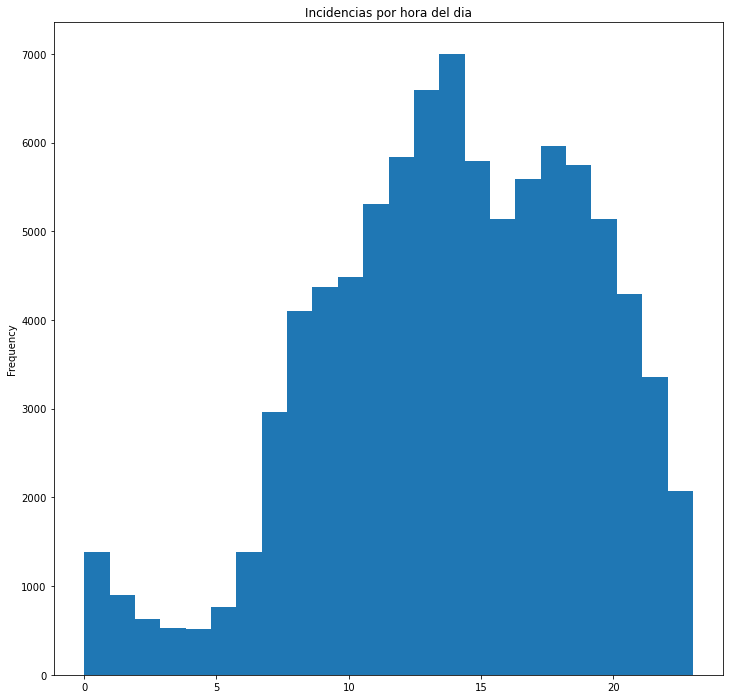

In [3]:
accidents['HORA'].plot(kind = 'hist', bins = 24, figsize = (12,12))
plt.gca().set(title='Incidencias por hora del dia')
plt.show()

Following the time-related analysis, next we have the monthly distribution of accidents. A brief scrutiny reveals that accidents seem to folow heat, being more present in the hot months. Of course there is a decrease in August, due to less commercial activity.

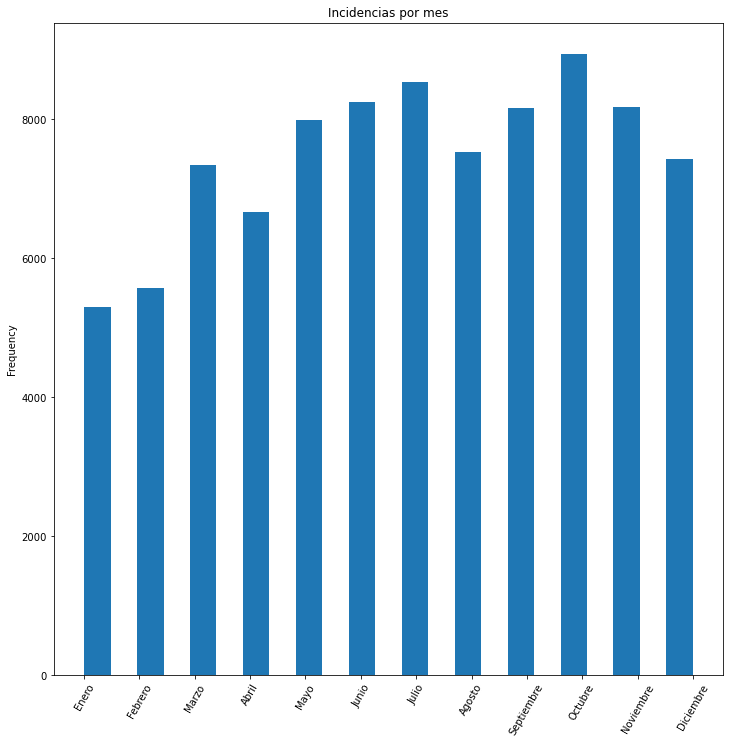

In [4]:
import numpy as np
accidents['MES'].plot(kind = 'hist', bins = 23, figsize = (12,12))
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Enero', 'Febrero', 'Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre'],rotation=60)
plt.gca().set(title='Incidencias por mes')
plt.show()

Concluding our time-based data, we have a new type of graph: the **kernel density estimate**, or **kde**. Think of it like a continuous-variable histogram. Here I've represented the motorcyclist mortality distribution, showing the accidents with no rider deaths as well as those with 1 dead rider and those with 2, arranged chronologically.

The sudden spike between August and September is probably due to riders forming partys or groups and engage together the canyon and mountain roads. Motorcycle parties can be dangerous because they tend to incite and enhance aggresive behaviours between members.

Notice how the curve showing the distribution of accidents without motorcyclist deaths follow the same pattern as the graph above.

[Text(0.5, 1.0, 'Mortalidad motociclistas por mes')]

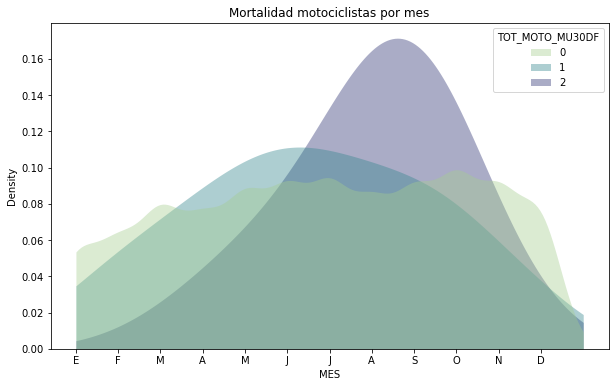

In [138]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 6]

dm = sns.kdeplot(
   data=accidents, x="MES", hue="TOT_MOTO_MU30DF",
   fill=True, common_norm=False, palette="crest", bw_adjust=1.5,
   alpha=0.4, linewidth=0, clip=(1,13)
)
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12], ['E','F','M','A','M','J','J','A','S','O','N','D'])
plt.gca().set(title='Mortalidad motociclistas por mes')

Let's change the subject a little and focus on **placement**. The next figure shows the comparison between accidents happened in urban or non-urban road.

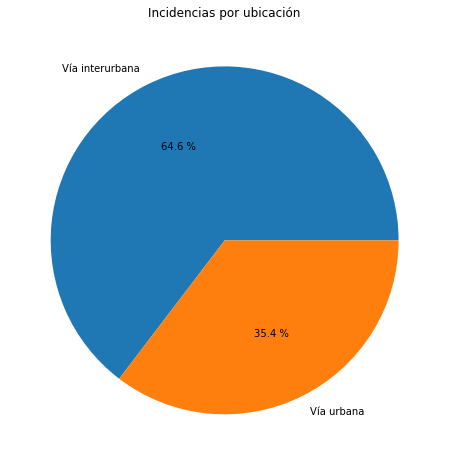

In [6]:
cont_za = accidents.value_counts(accidents['ZONA_AGRUPADA'].values)

labels=['Vía interurbana','Vía urbana']
plt.figure(figsize=(8, 8))
plt.pie(cont_za,labels=labels,autopct='%.1f %%')
plt.title('Incidencias por ubicación')


plt.show()

The next graph ilustrates the ammount of accidents per road type. Sadly, the type with most entries is the *Not specified* one, making it harder to extract information.

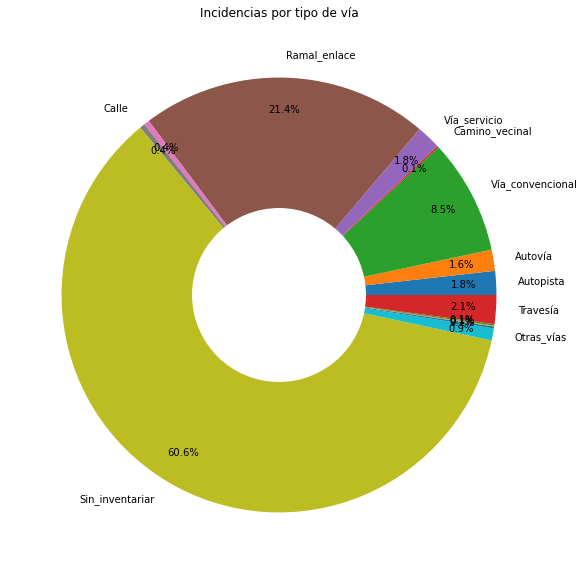

In [7]:
cont_via = accidents.value_counts(accidents['TIPO_VIA'].values, sort=False)

labels=['Autopista', 'Autovía', 'Vía_convencional', 'Camino_vecinal', 'Vía_servicio', 'Ramal_enlace', ' ', 'Calle', 'Sin_inventariar', 'Otras_vías', ' ', ' ', ' ','Travesía']

plt.figure(figsize=(10, 10))
plt.pie(cont_via,labels=labels,autopct='%1.1f%%', pctdistance=0.85)
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig = plt.gcf()

fig.gca().add_artist(center_circle)
plt.title('Incidencias por tipo de vía')


plt.show()

Not that I am worried, we just have to tweak the data a little. Here I apply a filter dismissing all entries with a *Not specified* road. Then I perform a **value count** and see the Spanish roads with most accidents. The **A-7** highway is the one that get the dubious honour of being the most dangerous road of 2021.

In [8]:
filtron=accidents[(accidents['CARRETERA'] != 'No inventariada')]
x = filtron['CARRETERA']
cont_carr = filtron.value_counts(x.values, sort=True)
cont_carr[:100]

A-7       804
AP-7      704
A-2       633
N-340     487
A-4       382
         ... 
AC-552     50
AP-4       48
N-637      47
N-230      46
Ma-15      46
Name: count, Length: 100, dtype: int64

We can visualize the data with a bar plot, sorted in increasing numbers.

[Text(0.5, 1.0, 'Incidencias por carretera')]

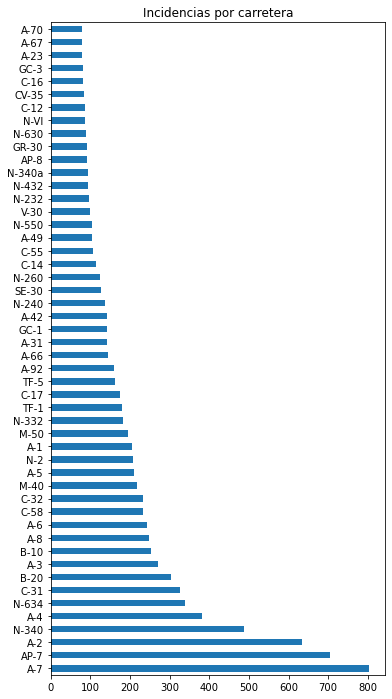

In [9]:
plt.rcParams['figure.figsize'] = [6, 12]
cont_carr[:50].plot.barh()
plt.gca().set(title='Incidencias por carretera')

Now let's apply another filter. I'll select the entries with at least one rider killed, sort the results and put them in a bar graph, like before. The results vary a little but both of them confirm that the roads of eastern and mediterranean Spain (A-7, AP-7, N-340, A-2...) are by far the most dangerous.

[Text(0.5, 1.0, 'Mortalidad motociclistas por carretera')]

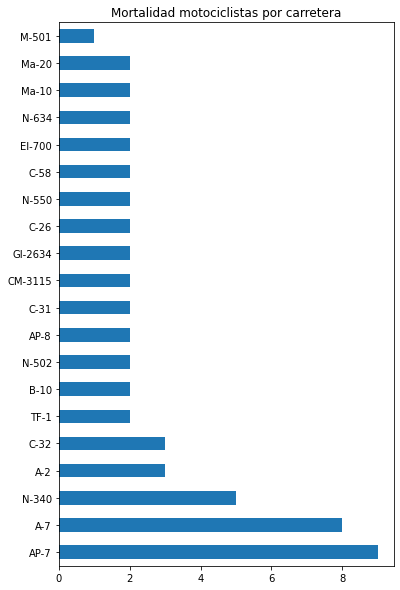

In [10]:
filtromm = filtron[(filtron['TOT_MOTO_MU30DF']>0)]
cont_carrmm = filtromm.value_counts(filtromm['CARRETERA'].values, sort=True)

plt.figure(figsize=(6, 10))
cont_carrmm[:20].plot.barh()
plt.gca().set(title='Mortalidad motociclistas por carretera')

Let's go back a little and combine both time and location data. In the kde plot below we see the accident distribution outside (1) and inside (2) cities. 

This graph tells us more than it seems at first sight. Notice the vacational periods, where the difference between urban and non-urban accidents makes itself evident. In August, spaniards love to grab the car and hit the roads, but in Winter and Spring there's usually little tourism involved.

[Text(0.5, 1.0, 'Incidencias en la autopista AP-7')]

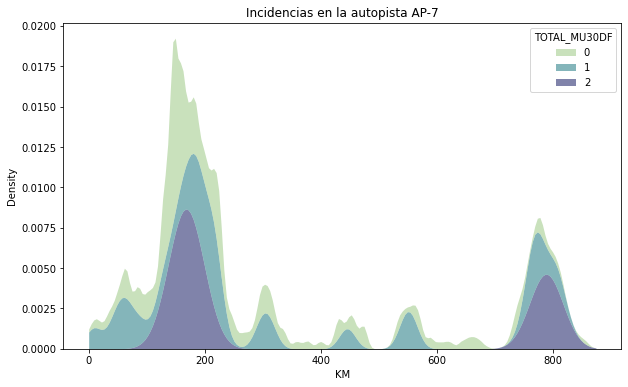

In [139]:
accap7 = accidents[(accidents['CARRETERA'] == 'AP-7')]

dm = sns.kdeplot(
   data=accap7, x="KM", hue="TOTAL_MU30DF", multiple="stack",
   fill=True, common_norm=False, palette="crest", bw_adjust=0.1,
   alpha=0.6, linewidth=0, clip=(0,880)
)
plt.gca().set(title='Incidencias en la autopista AP-7')

[Text(0.5, 1.0, 'Incidencias el la autovía A-7')]

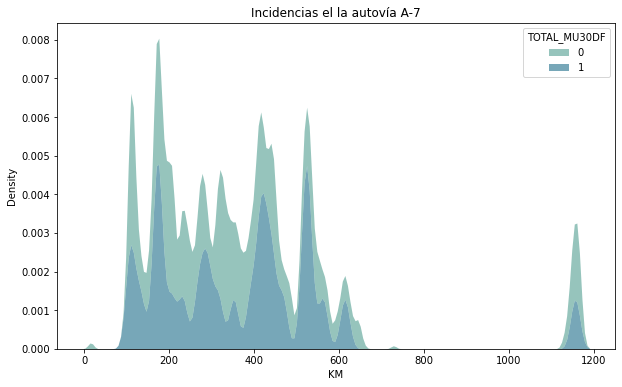

In [140]:
acca7 = accidents[(accidents['CARRETERA'] == 'A-7')]

dm = sns.kdeplot(
   data=acca7, x="KM", hue="TOTAL_MU30DF", multiple="stack",
   fill=True, common_norm=False, palette="crest", bw_adjust=0.1,
   alpha=0.6, linewidth=0
)
plt.gca().set(title='Incidencias el la autovía A-7')

[Text(0.5, 1.0, 'Incidencias el la autovía A-2')]

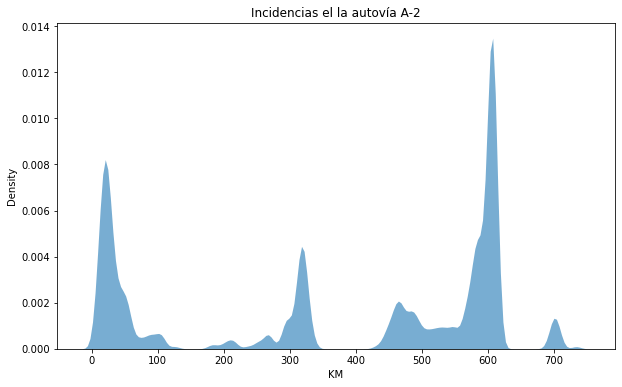

In [144]:
acca2 = accidents[(accidents['CARRETERA'] == 'A-2')]

dm = sns.kdeplot(
   data=acca2, x="KM",
   fill=True, common_norm=False, bw_adjust=0.1,
   alpha=0.6, linewidth=0
)
plt.gca().set(title='Incidencias el la autovía A-2')

For the last graph I'm plotting multiple distributions at the same time. This is a good way to see if two sets of data correlate to the variable in the main axis, month of year in this case. 

<function matplotlib.pyplot.show(close=None, block=None)>

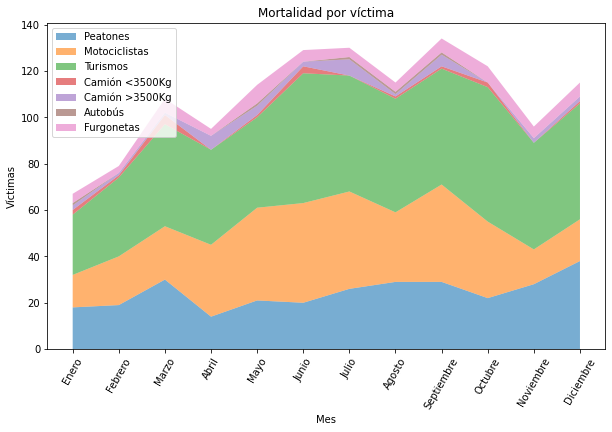

In [153]:
x1 = accidents[(accidents['TOT_PEAT_MU30DF']> 0)]
x2 = accidents[(accidents['TOT_MOTO_MU30DF']> 0)]
x3 = accidents[(accidents['TOT_TUR_MU30DF']> 0)]
x4 = accidents[(accidents['TOT_FURG_MU30DF']> 0)]
x5 = accidents[(accidents['TOT_CAM_MENOS3500_MU30DF']>0)]
x6 = accidents[(accidents['TOT_CAM_MAS3500_MU30DF']>0)]
x7 = accidents[(accidents['TOT_BUS_MU30DF']> 0)]

x11 = x1.value_counts(x1['MES'].to_numpy(), sort=False)
x22 = x2.value_counts(x2['MES'].to_numpy(), sort=False)
x33 = x3.value_counts(x3['MES'].to_numpy(), sort=False)
x44 = x4.value_counts(x4['MES'].to_numpy(), sort=False)
x55 = x5.value_counts(x5['MES'].to_numpy(), sort=False).reindex([1,2,3,4,5,6,7,8,9,10,11,12], fill_value=0)
x66 = x6.value_counts(x6['MES'].to_numpy(), sort=False).reindex([1,2,3,4,5,6,7,8,9,10,11,12], fill_value=0)
x77 = x7.value_counts(x7['MES'].to_numpy(), sort=False).reindex([1,2,3,4,5,6,7,8,9,10,11,12], fill_value=0)

mort_vict = {'Peatones':x11,'Motociclistas':x22,'Turismos':x33,'Camión <3500Kg':x55,'Camión >3500Kg':x66,'Autobús':x77,'Furgonetas':x44}
#acc_mort = [x11,x22,x33,x44,x55,x66,x77]
mes = ['Enero', 'Febrero', 'Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
nmes = [1,2,3,4,5,6,7,8,9,10,11,12]
fig, ax = plt.subplots()
ax.stackplot(nmes, mort_vict.values(),
             labels=mort_vict.keys(), alpha=0.6)
ax.legend(loc='upper left')
ax.set_title('Mortalidad por víctima')
ax.set_xlabel('Mes')
ax.set_ylabel('Víctimas')
ax.set_xticks(nmes)
ax.set_xticklabels(mes,rotation=60)

plt.show

I hope you enjoyed my analysis and found it useful, or at least interesting. This is but a simple analysis performed onto a open-source convoluted database, that is surely useful for the purpose it was designed for, but not as much for data science.

This exercise is just an example showing that any database can be the object of scientific data analysis, and useful information can always be extarcted, if you know how.